In [4]:
from tensorflow.keras.datasets import mnist

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
single_img = x_train[0]
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

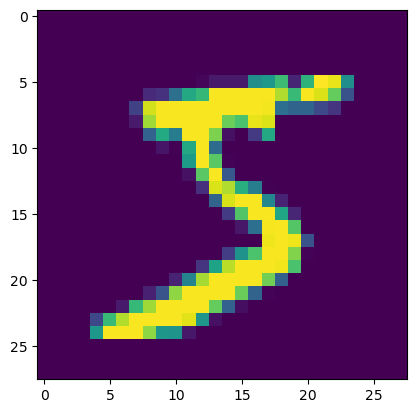

In [9]:
plt.imshow(single_img)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
y_example = to_categorical(y_train)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [19]:
y_cat_train = to_categorical(y_train, 10)

In [21]:
single_img.max()

255

In [22]:
single_img.min()

0

In [23]:
x_train = x_train/255

In [24]:
x_test = x_test/255

In [25]:
scaled_image = x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

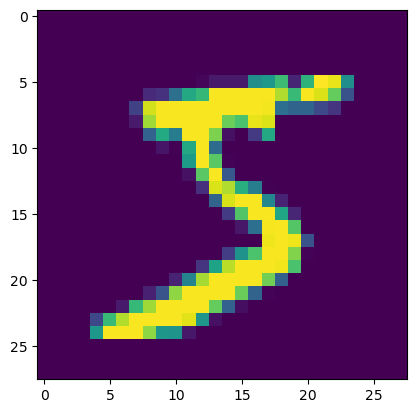

In [26]:
plt.imshow(scaled_image)

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
#batch size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [29]:
x_test = x_test.reshape(10000,28,28,1)

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [45]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [39]:
x_train.shape

(60000, 28, 28, 1)

In [41]:
x_test.shape

(10000, 28, 28, 1)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [48]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1433 - accuracy: 0.9561 - val_loss: 0.0611 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0521 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0402 - val_accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0455 - val_accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0430 - val_accuracy: 0.9875


In [49]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

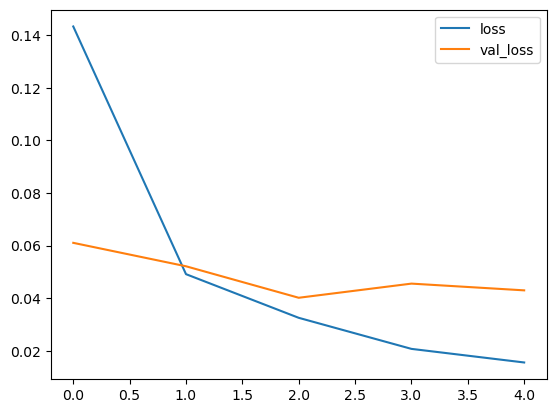

In [51]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

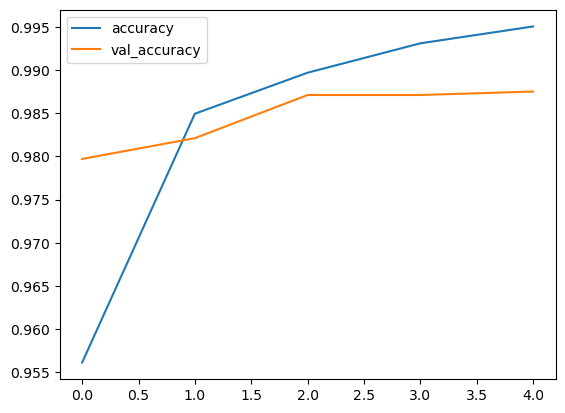

In [54]:
metrics[['accuracy', 'val_accuracy']].plot()

In [56]:
model.metrics_names

['loss', 'accuracy']

In [55]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.042986709624528885, 0.987500011920929]

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [69]:
print(classification_report(y_test, np.argmax( predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [70]:
confusion_matrix(y_test, np.argmax(predictions, axis = 1))

array([[ 972,    0,    0,    1,    1,    0,    5,    0,    0,    1],
       [   0, 1130,    0,    0,    1,    2,    1,    1,    0,    0],
       [   0,    4, 1019,    0,    1,    0,    0,    6,    2,    0],
       [   0,    0,    5,  992,    0,    9,    0,    1,    3,    0],
       [   0,    0,    1,    0,  973,    0,    2,    0,    0,    6],
       [   1,    0,    0,    1,    0,  887,    2,    0,    1,    0],
       [   3,    2,    0,    0,    5,    5,  941,    0,    2,    0],
       [   1,    2,    8,    0,    1,    0,    0, 1012,    1,    3],
       [   5,    0,    4,    0,    0,    0,    2,    2,  959,    2],
       [   0,    1,    0,    1,    8,    5,    0,    2,    2,  990]])

In [71]:
my_number = x_test[100]

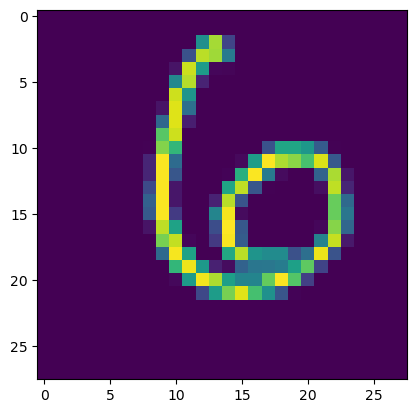

In [73]:
plt.imshow(my_number.reshape(28,28))

In [75]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)))

1/1 [==============================] - 0s 12ms/step


6